In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [38]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
print(tf.__version__)

2.12.0


In [39]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='image.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('image.zip')
f.keys()
!unzip image.zip

Archive:  image.zip
  inflating: image/Ainul/0.jpg       
  inflating: image/Ainul/1.jpg       
  inflating: image/Ainul/10.jpg      
  inflating: image/Ainul/107.jpg     
  inflating: image/Ainul/117.jpg     
  inflating: image/Ainul/120.jpg     
  inflating: image/Ainul/122.jpg     
  inflating: image/Ainul/123.jpg     
  inflating: image/Ainul/126.jpg     
  inflating: image/Ainul/134.jpg     
  inflating: image/Ainul/149.jpg     
  inflating: image/Ainul/150.jpg     
  inflating: image/Ainul/169.jpg     
  inflating: image/Ainul/184.jpg     
  inflating: image/Ainul/186.jpg     
  inflating: image/Ainul/188.jpg     
  inflating: image/Ainul/197.jpg     
  inflating: image/Ainul/202.jpg     
  inflating: image/Ainul/203.jpg     
  inflating: image/Ainul/22.jpg      
  inflating: image/Ainul/221.jpg     
  inflating: image/Ainul/225.jpg     
  inflating: image/Ainul/229.jpg     
  inflating: image/Ainul/233.jpg     
  inflating: image/Ainul/235.jpg     
  inflating: image/Ainul/241.j

In [40]:
import os
print(os.listdir('/content/image'))

['Mohona', 'Ainul', 'Jannat', 'Sahajahan', 'Aznur', 'Mim', 'Rafat', 'Kafi sir', 'Rasa']


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [42]:
#Making the functions to get the training and validation set from the Images
X=[]
Z=[]
IMG_SIZE=150
Ainul_DIR='/content/image/Ainul'
Aznur_DIR='/content/image/Aznur'
Jannat_DIR='/content/image/Jannat'
Kafi_sir_DIR='/content/image/Kafi sir'
Mim_DIR='/content/image/Mim'
Mohona_DIR='/content/image/Mohona'
Rafat_DIR='/content/image/Rafat'
Rasa_DIR='/content/image/Rasa'
Shajahan_DIR='/content/image/Sahajahan'

In [43]:
def assign_label(img,image_type):
    return image_type

In [44]:
def make_train_data(image_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,image_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))


In [45]:
make_train_data('Ainul',Ainul_DIR)
print(len(X))

100%|██████████| 77/77 [00:00<00:00, 440.58it/s]

77


In [46]:
make_train_data('Aznur',Aznur_DIR)
print(len(X))

100%|██████████| 199/199 [00:00<00:00, 426.38it/s]

276


In [47]:
make_train_data('jannat',Jannat_DIR)
print(len(X))

100%|██████████| 168/168 [00:00<00:00, 169.57it/s]

444


In [48]:
make_train_data('Kafi_Sir',Kafi_sir_DIR)
print(len(X))

100%|██████████| 147/147 [00:00<00:00, 501.23it/s]

591


In [49]:
make_train_data('Mim',Mim_DIR)
print(len(X))

100%|██████████| 149/149 [00:00<00:00, 1376.55it/s]

740


In [50]:
make_train_data('mohona',Mohona_DIR)
print(len(X))

100%|██████████| 151/151 [00:00<00:00, 704.49it/s]

891


In [51]:
make_train_data('Rafat',Rafat_DIR)
print(len(X))

100%|██████████| 154/154 [00:00<00:00, 697.07it/s]

1045


In [52]:
make_train_data('Rasa',Rasa_DIR)
print(len(X))

100%|██████████| 151/151 [00:00<00:00, 288.20it/s]

1196


In [53]:
make_train_data('Shajahan',Shajahan_DIR)
print(len(X))

100%|██████████| 150/150 [00:00<00:00, 943.42it/s]

1346


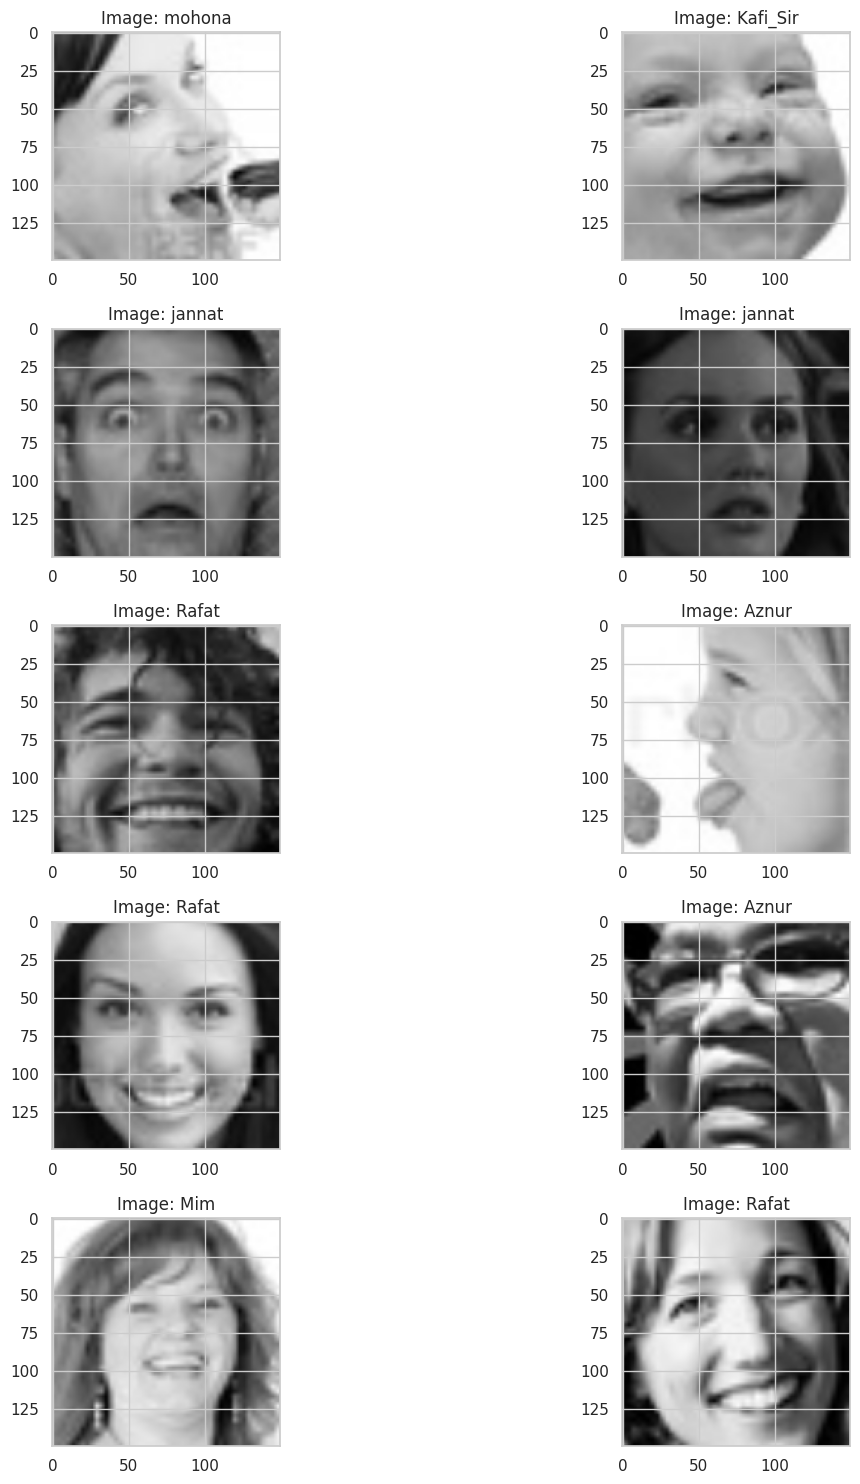

In [54]:
#visulized some random flower
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Image: '+Z[l])
        
plt.tight_layout()

In [55]:
#Label Encoding the Y array (i.e. Rasa->0, Rafat->1 etc...) & then One Hot Encoding
le=LabelEncoder()
Y=le.fit_transform(Z)
Y = to_categorical(Y,9)
X=np.array(X)
X=X/255 

In [66]:
#Splitting into Training and Validation Sets
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [71]:
#Building the ConvNet Model

# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(9, activation = "softmax"))

In [72]:
#Using a LR Annealer
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [73]:
#Data Augmentation to prevent Overfitting
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [74]:
#Compiling the Keras Model & Summary
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 18, 18, 96)      

In [75]:
#Fitting on the Training set and making predcitons on the Validation set

#History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size), epochs = epochs, validation_data = (x_test,y_test), verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
model.fit(x_train,y_train,epochs = 25, batch_size=50)  #validation_data = (x_test,y_test)

Epoch 1/25
22/22 [==============================] - 73s 3s/step - loss: 2.1978 - accuracy: 0.1292
Epoch 2/25
22/22 [==============================] - 69s 3s/step - loss: 2.1831 - accuracy: 0.1496
Epoch 3/25
22/22 [==============================] - 68s 3s/step - loss: 2.1809 - accuracy: 0.1496
Epoch 4/25
22/22 [==============================] - 70s 3s/step - loss: 2.1788 - accuracy: 0.1496
Epoch 5/25
22/22 [==============================] - 71s 3s/step - loss: 2.1734 - accuracy: 0.1533
Epoch 6/25
22/22 [==============================] - 70s 3s/step - loss: 2.1674 - accuracy: 0.1533
Epoch 7/25
22/22 [==============================] - 70s 3s/step - loss: 2.1469 - accuracy: 0.1803
Epoch 8/25
22/22 [==============================] - 68s 3s/step - loss: 2.1128 - accuracy: 0.1812
Epoch 9/25
22/22 [==============================] - 70s 3s/step - loss: 2.0676 - accuracy: 0.2072
Epoch 10/25
22/22 [==============================] - 68s 3s/step - loss: 2.0077 - accuracy: 0.2249
Epoch 11/25
22/22 [